**Librerias a usar**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

**EDA Train.parquet**

In [3]:
# Leer train.parquet a dataframe
df_train = pd.read_parquet('proyecto_ML/train.parquet')

In [ ]:
df_train.info()

In [81]:
df_train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,category_code
count,1.042490e+05,1.042490e+05,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000,104249.000000
mean,7.041475e+09,1.998674e+03,1079.034053,2.046610,1.506652,0.713004,0.687086,0.585128,0.097929,0.021593,0.064969,38.380591,-95.451159,0.383275
std,9.188914e+06,8.040893e+04,773.183555,0.883671,0.617195,0.452362,0.463682,0.492702,0.297220,0.145350,0.246473,5.875553,18.129966,0.486187
min,7.004042e+09,5.500000e+01,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000,0.000000
25%,7.036388e+09,8.700000e+02,780.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.253800,-111.662000,0.000000
50%,7.044501e+09,1.160000e+03,980.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,39.044400,-90.178000,0.000000
75%,7.049013e+09,1.595000e+03,1208.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,42.283100,-81.513000,1.000000
max,7.051292e+09,1.850200e+07,99202.000000,8.000000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,172.633000,1.000000


In [56]:
# Eliminar todas las filas con valores nulos del df
df_train.dropna(inplace=True)

In [55]:
# Eliminar las filas con la columna image_url duplicadas y probaremos su impacto en el modelo . Se eliminaron 168245 filas
df_train.drop_duplicates(subset=['image_url'], inplace=True)

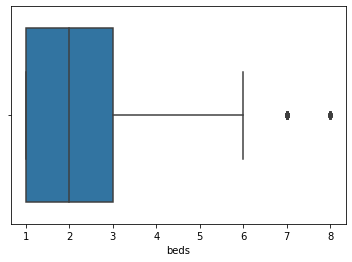

In [14]:
# Inspeccionar outlier en 'beds'
sns.boxplot(x = 'beds', data = df_train)
plt.show()

In [15]:
# Visualizar outliers de 'beds'
df_train.sort_values(by='beds',ascending=False)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
275983,7049667445,https://iowacity.craigslist.org/apa/d/iowa-cit...,iowa city,https://iowacity.craigslist.org,742,house,1904,8,4.0,1,...,0,0,1,None,None,https://images.craigslist.org/00J0J_4Hv19y1su2...,This space has it all! The upgrades are endles...,41.6355,-91.5016,ia
324694,7032088507,https://albany.craigslist.org/apa/d/albany-col...,albany,https://albany.craigslist.org,4000,apartment,2600,8,2.0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00R0R_k48sCDL2YR...,J&J Investment Properties LLC specializes in p...,42.6614,-73.7794,ny
59717,7039339432,https://madison.craigslist.org/apa/d/madison-8...,madison,https://madison.craigslist.org,4650,house,3500,8,3.0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_lhy1N1vg78...,Huge House room for up to 8. Across from the f...,43.0679,-89.4142,wi
114679,7024009573,https://boulder.craigslist.org/apa/d/boulder-1...,boulder,https://boulder.craigslist.org,1000,apartment,1944,8,3.0,0,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00R0R_6BTz2oGu3h...,1 large room available in basement unit of hou...,40.0172,-105.2850,co
253406,7028736338,https://terrehaute.craigslist.org/apa/d/terre-...,terre haute,https://terrehaute.craigslist.org,1950,apartment,3800,8,4.0,0,...,0,0,0,None,None,https://images.craigslist.org/01414_9OaOvmSfGc...,This three story house is perfect for a large ...,39.4710,-87.4009,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63667,7050761236,https://roanoke.craigslist.org/apa/d/roanoke-1...,roanoke,https://roanoke.craigslist.org,440,apartment,465,1,1.0,0,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00W0W_86EWL8TGUj...,"Clean , Quiet, One Bedroom , 1 Bath, Apartment...",37.3020,-80.0494,va
211087,7049895466,https://tucson.craigslist.org/apa/d/tucson-che...,tucson,https://tucson.craigslist.org,600,apartment,615,1,1.0,1,...,0,0,0,laundry on site,carport,https://images.craigslist.org/00Q0Q_cx31ZixYiJ...,Toscana Cove Apartment Community located on th...,32.2352,-110.8080,az
211088,7050937825,https://houston.craigslist.org/apa/d/houston-m...,houston,https://houston.craigslist.org,1381,apartment,948,1,1.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00S0S_kTiYfp0rCl...,"Woodway Square 1200 Winrock Blvd Houston, TX 7...",29.7422,-95.4903,tx
63651,7048367905,https://flint.craigslist.org/apa/d/flint-weste...,flint,https://flint.craigslist.org,549,apartment,750,1,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01313_432tp8Xbt4...,"Welcome Home Here at Western Pines Apartments,...",42.9949,-83.7996,mi


In [57]:
# aplicar correciones para eliminacion de ouliers
df_train = df_train[df_train['beds']>0]
df_train = df_train[df_train['beds']<10]

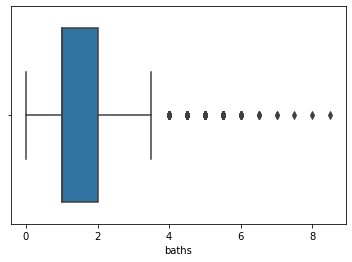

In [16]:
# Inspeccionar outlier en 'baths'
sns.boxplot(x = 'baths', data = df_train)
plt.show()

In [18]:
# No se visualiza outlier en baths
df_train.sort_values(by='baths',ascending=True)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
222479,7042370975,https://dallas.craigslist.org/dal/apa/d/plano-...,dallas / fort worth,https://dallas.craigslist.org,1075,apartment,650,1,0.0,0,...,0,0,0,None,None,https://images.craigslist.org/00101_ijUgUEppLJ...,Arthur-Agent with 1 Source Apartments Call sh...,33.0299,-96.7889,tx
252350,7040102211,https://rochester.craigslist.org/apa/d/rochest...,rochester,https://rochester.craigslist.org,1108,townhouse,1486,5,0.0,1,...,1,0,0,no laundry on site,off-street parking,https://images.craigslist.org/00F0F_hW2UJ2BU1N...,Orchard Place Apartments currently has a 5 Bed...,43.2346,-77.6577,ny
321095,7049502550,https://williamsport.craigslist.org/apa/d/bloo...,williamsport,https://williamsport.craigslist.org,675,apartment,1300,1,0.0,1,...,0,0,1,None,None,https://images.craigslist.org/00W0W_2jgBQWPTdZ...,"Fully Furnished â@Loft,â Very Light, âBr...",41.0115,-76.4384,pa
12972,7048624402,https://sacramento.craigslist.org/apa/d/rancho...,sacramento,https://sacramento.craigslist.org,1465,apartment,1025,3,0.0,1,...,0,0,0,None,None,https://images.craigslist.org/01010_9ljIUsnRKw...,Monday: 10AM-6PM Tuesday: 9AM-6PM Wednesday: 9...,38.6072,-121.2760,ca
126715,7042565790,https://flint.craigslist.org/apa/d/holly-no-re...,flint,https://flint.craigslist.org,799,manufactured,1100,3,0.0,0,...,1,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00t0t_36IkDKjZ7Q...,Get approved in as little as 24-48 hours !!! ...,42.7905,-83.6127,mi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16693,7036237174,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,499,house,7500,6,7.0,0,...,0,0,1,w/d in unit,attached garage,https://images.craigslist.org/00E0E_3h89kMpCaH...,Big luxurious Buckhead Mansion with gates up f...,33.8420,-84.4127,ga
186595,7039960713,https://cleveland.craigslist.org/apa/d/clevela...,cleveland,https://cleveland.craigslist.org,7995,house,9972,6,7.0,0,...,0,0,0,None,None,https://images.craigslist.org/00202_bmBfQ0gndG...,See better photos and SCHEDULE A SHOWING at:ht...,41.4826,-81.5635,oh
192205,7046941217,https://kansascity.craigslist.org/apa/d/kansas...,"kansas city, MO",https://kansascity.craigslist.org,4200,house,7500,7,7.5,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00h0h_clofPG4hk2...,BEAUTIFUL AND UPDATED Furnished 7 Bed / 7.5 Ba...,39.1736,-94.8668,ks
287344,7040027312,https://minneapolis.craigslist.org/hnp/apa/d/m...,minneapolis / st paul,https://minneapolis.craigslist.org,1,apartment,1001,8,8.0,1,...,0,0,1,laundry in bldg,off-street parking,https://images.craigslist.org/00808_fdAWeJ3ht1...,From Studio to 5BR/3BA. Even multiple units in...,44.9585,-93.2970,mn


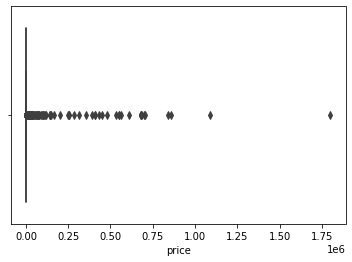

In [32]:
# Inspeccionar outlier en 'price'
sns.boxplot(x = 'price', data = df_train)
plt.show()

In [33]:
# Visualizar outliers de price
df_train.sort_values(by='price',ascending=True)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
112797,7049217185,https://lawton.craigslist.org/apa/d/lawton-we-...,lawton,https://lawton.craigslist.org,55,apartment,960,2,1.0,1,...,0,0,1,laundry in bldg,off-street parking,https://images.craigslist.org/00404_3XM5KAxulg...,"***WE HAVE FURNISHED UNITS, COME IN AND TAKE A...",34.6179,-98.4552,ok
161713,7049776444,https://lawton.craigslist.org/apa/d/lawton-the...,lawton,https://lawton.craigslist.org,55,apartment,960,2,1.0,1,...,0,0,1,laundry in bldg,off-street parking,https://images.craigslist.org/00101_eeM6lvVe86...,***CALL & ASK ABOUT OUR FURNISHED UNITS. START...,34.5945,-98.4821,ok
23100,7035196565,https://enid.craigslist.org/apa/d/enid-two-bed...,northwest OK,https://enid.craigslist.org,55,apartment,960,2,1.0,0,...,0,0,0,w/d in unit,None,https://images.craigslist.org/01616_2WFSAEZrBW...,Two Bedroom * Flat Screen TV * High Speed Inte...,36.4054,-97.9438,ok
190303,7049775884,https://lawton.craigslist.org/apa/d/lawton-we-...,lawton,https://lawton.craigslist.org,55,apartment,960,2,1.0,1,...,0,0,1,laundry in bldg,off-street parking,https://images.craigslist.org/00Y0Y_jMRO4jZXAx...,***We have furnished units available here at R...,34.6179,-98.4552,ok
228165,7049216519,https://lawton.craigslist.org/apa/d/we-have-fu...,lawton,https://lawton.craigslist.org,55,apartment,960,2,1.0,1,...,0,0,1,laundry in bldg,off-street parking,https://images.craigslist.org/00C0C_cGyfOCvAQN...,***CALL & ASK ABOUT OUR FURNISHED UNITS. START...,34.5945,-98.4821,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189319,7037788690,https://klamath.craigslist.org/apa/d/weed-mt-v...,klamath falls,https://klamath.craigslist.org,704873,apartment,1300,3,2.0,1,...,0,0,0,laundry on site,carport,https://images.craigslist.org/01616_bqhAurbbdW...,Mt. View Apartments located in Weed Ca. is acc...,41.4226,-122.3860,or
138316,7033376262,https://jackson.craigslist.org/apa/d/jackson-1...,jackson,https://jackson.craigslist.org,840865,apartment,761,1,1.0,1,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00c0c_3JRX8M0XYS...,The Reserve of Jackson Apartments 2501 River ...,32.3857,-90.0865,ms
234423,7045877729,https://indianapolis.craigslist.org/apa/d/indi...,indianapolis,https://indianapolis.craigslist.org,859864,apartment,802,2,1.0,0,...,0,0,0,laundry on site,carport,https://images.craigslist.org/00y0y_1XjONoW7Yi...,A/62 Apartments \t 2Bedroom (2x1) (802sqft) St...,39.8647,-86.1181,in
209080,7032655546,https://charlotte.craigslist.org/apa/d/mooresv...,charlotte,https://charlotte.craigslist.org,1089000,house,4300,3,4.0,0,...,0,0,0,None,None,https://images.craigslist.org/00O0O_eY3P8Blipq...,Tradition meets elegance in this timeless bric...,35.5840,-80.8685,nc


In [58]:
# Aplicar correccion de outliers
df_train = df_train[df_train['price']<7655765]
df_train = df_train[df_train['price']>50]

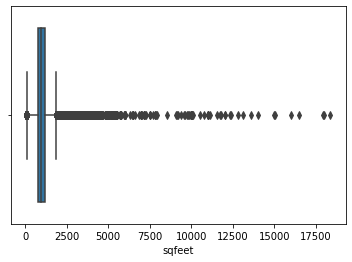

In [47]:
# Inspeccionar outlier en 'sqfeet'
sns.boxplot(x = 'sqfeet', data = df_train)
plt.show()

In [48]:
# Visualizar outliers de sqfeet
df_train.sort_values(by='sqfeet',ascending=False)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
79023,7021075927,https://jerseyshore.craigslist.org/apa/d/manas...,jersey shore,https://jerseyshore.craigslist.org,1400,house,18360,3,1.5,0,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00p0p_7P0TYi6oNs...,SPACIOUS 3 BEDROOM HOME AVAILABLE FOR A WINTER...,40.1217,-74.0611,nj
73809,7017432983,https://lakecharles.craigslist.org/apa/d/lake-...,lake charles,https://lakecharles.craigslist.org,1450,house,18000,3,2.0,0,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00d0d_6DtDMyAFkn...,"Home for rent $1,450 per month. $1,000 secur...",30.2460,-93.1572,la
283837,7047457158,https://reno.craigslist.org/apa/d/gardnerville...,reno / tahoe,https://reno.craigslist.org,1995,house,17951,3,2.0,0,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00R0R_5BNnRC8pup...,3 bedrooms/2 bathrooms/2 car garage/game room/...,38.9166,-119.7270,ca
334193,7049568115,https://pittsburgh.craigslist.org/apa/d/pittsb...,pittsburgh,https://pittsburgh.craigslist.org,1800,house,16500,4,2.0,0,...,0,0,1,w/d in unit,off-street parking,https://images.craigslist.org/01616_8Y9digceDD...,"Best Location!!! Available January-15, Interna...",40.4442,-79.9239,pa
144780,7048815001,https://palmsprings.craigslist.org/apa/d/deser...,palm springs,https://palmsprings.craigslist.org,1350,house,16000,3,2.0,0,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/01515_awIKqy5G0q...,FOR RENT IN DESERT HOT SPRINGS 3 bdr 2 bath 1...,33.9499,-116.4960,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201513,7039126571,https://albany.craigslist.org/apa/d/albany-lar...,albany,https://albany.craigslist.org,1290,apartment,55,2,1.0,1,...,0,0,0,laundry in bldg,street parking,https://images.craigslist.org/00I0I_kAKdN10XuD...,"Bright, spacious and newly renovated. Fenced p...",42.6488,-73.7648,ny
94056,7039126883,https://albany.craigslist.org/apa/d/albany-lar...,albany,https://albany.craigslist.org,1190,apartment,55,1,1.0,1,...,0,0,0,laundry in bldg,street parking,https://images.craigslist.org/00M0M_jwTnbDlzip...,"Bright, spacious and newly renovated. Fenced p...",42.6488,-73.7648,ny
300745,7048996418,https://bham.craigslist.org/apa/d/birmingham-n...,birmingham,https://bham.craigslist.org,950,house,55,3,1.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00y0y_39DKIDiezL...,Big 3 bedroom 1 bath 1/2 Block from UAB Great ...,33.4951,-86.8059,al
57699,7037491798,https://philadelphia.craigslist.org/apa/d/phil...,philadelphia,https://philadelphia.craigslist.org,1040,apartment,55,1,1.0,1,...,0,0,0,None,None,https://images.craigslist.org/00A0A_dBBRKrIrD5...,Walking distance to Drexel! one bedroom apartm...,39.9597,-75.2024,pa


In [59]:
# Aplicar correcciones
df_train = df_train[df_train['sqfeet']<20000]
df_train = df_train[df_train['sqfeet']>50]

In [60]:
# Transformar en dummies
df_train = pd.concat([df_train, pd.get_dummies(df_train['type'], prefix='type')], axis=1)
df_train = df_train.drop(columns=['type_assisted living','type_land'])
df_train = pd.concat([df_train, pd.get_dummies(df_train['laundry_options'], prefix='laundry_options')], axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['parking_options'], prefix='parking_options')], axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['state'], prefix='state')], axis=1)

In [61]:
# Categorizando la columna price
bins = [0, 999, 1999, float('inf')]
labels = ['low', 'medium', 'high']
df_train['category_price'] = pd.cut(df_train['price'], bins=bins, labels=labels)
# Mapear valores para las categorias
df_train['category_code'] = df_train['category_price'].map({'low': 1, 'medium': 0, 'high': 0})


In [64]:
# Seleccionando solo las caracteristcas que se van importar
df_xTrain=df_train[['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
'wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options',
'parking_options','type_apartment', 'type_condo', 'type_cottage/cabin',
'type_duplex', 'type_flat', 'type_house','type_in-law','type_loft','type_manufactured', 'type_townhouse','laundry_options_laundry in bldg', 'laundry_options_laundry on site',
'laundry_options_no laundry on site','laundry_options_w/d hookups',
'laundry_options_w/d in unit','parking_options_attached garage','parking_options_carport', 'parking_options_detached garage','parking_options_no parking',
'parking_options_off-street parking','parking_options_street parking',
'parking_options_valet parking','state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co','state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky','state_la',
'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn','state_mo', 'state_ms',
'state_mt', 'state_nc', 'state_nd', 'state_ne','state_nh', 'state_nj', 'state_nm',
'state_nv', 'state_ny', 'state_oh','state_ok', 'state_or', 'state_pa', 'state_ri',
'state_sc', 'state_sd','state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
'state_wa','state_wi', 'state_wv', 'state_wy','category_code']]

In [66]:
# Exportar datadrame y generar .parquet para ser usado con los modelos
df_xTrain.to_parquet('proyecto_ML/x_train.parquet',index=False)

**Transformaciones Test.parquet**

In [70]:
df_test = pd.read_parquet('proyecto_ML/test.parquet')

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 94 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  38498 non-null  int64  
 1   url                                 38498 non-null  object 
 2   region                              38498 non-null  object 
 3   region_url                          38498 non-null  object 
 4   type                                38498 non-null  object 
 5   sqfeet                              38498 non-null  int64  
 6   beds                                38498 non-null  int64  
 7   baths                               38498 non-null  float64
 8   cats_allowed                        38498 non-null  int64  
 9   dogs_allowed                        38498 non-null  int64  
 10  smoking_allowed                     38498 non-null  int64  
 11  wheelchair_access                   38498

In [5]:
df_test.describe()

,id,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849800e+04,38498.000000,38498.000000,38498.000000,38498.000000,38498.000000,38498.000000,38498.000000,38498.000000,38498.000000,38302.000000,38302.000000
mean,7.040931e+09,1002.062964,1.924749,1.484129,0.727674,0.708426,0.732064,0.083381,0.013585,0.048002,37.225599,-92.657573
std,8.783775e+06,686.933541,5.665451,0.700228,0.445162,0.454493,0.442890,0.276461,0.115762,0.213774,5.502983,16.359293
min,7.004010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.253830,-159.420000
25%,7.035888e+09,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.471700,-99.790000
50%,7.043099e+09,947.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.619050,-87.857850
75%,7.048393e+09,1150.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.146800,-81.242075
max,7.051284e+09,95242.000000,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.881000,94.124800


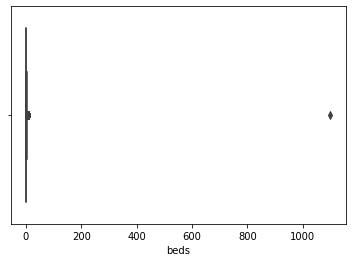

In [6]:
# Inspeccionar outlier en 'beds'
sns.boxplot(x = 'beds', data = df_test)
plt.show()

In [72]:
# Transformar en dummies
df_test = pd.concat([df_test, pd.get_dummies(df_test['type'], prefix='type')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['laundry_options'], prefix='laundry_options')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['parking_options'], prefix='parking_options')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['state'], prefix='state')], axis=1)

In [73]:
df_xTest=df_test[['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
'wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options',
'parking_options','type_apartment', 'type_condo', 'type_cottage/cabin',
'type_duplex', 'type_flat', 'type_house','type_in-law','type_loft','type_manufactured', 'type_townhouse','laundry_options_laundry in bldg', 'laundry_options_laundry on site',
'laundry_options_no laundry on site','laundry_options_w/d hookups',
'laundry_options_w/d in unit','parking_options_attached garage','parking_options_carport', 'parking_options_detached garage','parking_options_no parking',
'parking_options_off-street parking','parking_options_street parking',
'parking_options_valet parking','state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co','state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky','state_la',
'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn','state_mo', 'state_ms',
'state_mt', 'state_nc', 'state_nd', 'state_ne','state_nh', 'state_nj', 'state_nm',
'state_nv', 'state_ny', 'state_oh','state_ok', 'state_or', 'state_pa', 'state_ri',
'state_sc', 'state_sd','state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
'state_wa','state_wi', 'state_wv', 'state_wy']]

In [77]:
df_xTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 84 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sqfeet                              38498 non-null  int64  
 1   beds                                38498 non-null  int64  
 2   baths                               38498 non-null  float64
 3   cats_allowed                        38498 non-null  int64  
 4   dogs_allowed                        38498 non-null  int64  
 5   smoking_allowed                     38498 non-null  int64  
 6   wheelchair_access                   38498 non-null  int64  
 7   electric_vehicle_charge             38498 non-null  int64  
 8   comes_furnished                     38498 non-null  int64  
 9   laundry_options                     30643 non-null  object 
 10  parking_options                     24493 non-null  object 
 11  type_apartment                      38498

In [74]:
df_xTest.to_parquet('proyecto_ML/x_test.parquet',index=False)